##  "Machine learning model for Airplane accident severity predicition"

### Importing all required libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="whitegrid")
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing the dataset
dataset = pd.read_csv('AirplaneAccident.csv')

In [3]:
#getting an intuition of the data
dataset.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


### Splitting the data into training set and test set

In [4]:
y = dataset['Severity']
x = dataset.drop(['Severity','Accident_ID'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Check for any missing data

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636910,32060.336420,38380.641515,64297.651220
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


### Visualizing the data distribution

Points with class label -> 'Highly fatal and damaging' are =  30.490000000000002 %
Points with class label -> 'Significant damage and serious injuries' are =  27.29 %
Points with class label -> 'Minor damage and injuries' are =  25.27 %
Points with class label -> 'Significant damage and fatalities' are =  16.950000000000003 %


([<matplotlib.patches.Wedge at 0x2b50a31e848>,
 [Text(0.6327885049635631, 0.8997659184398901, 'Highly fatal and damaging'),
  Text(-1.0261520927877268, 0.39624724916063275, 'Significant damage and serious injuries'),
  Text(-0.31252728464569235, -1.0546689984786652, 'Minor damage and injuries'),
  Text(0.9476946595353, -0.5584575474360357, 'Significant damage and fatalities')],
 [Text(0.34515736634376165, 0.4907814100581218, '30.5%'),
  Text(-0.5597193233387601, 0.21613486317852693, '27.3%'),
  Text(-0.17046942798855946, -0.575273999170181, '25.3%'),
  Text(0.5169243597465272, -0.30461320769238304, '17.0%')])

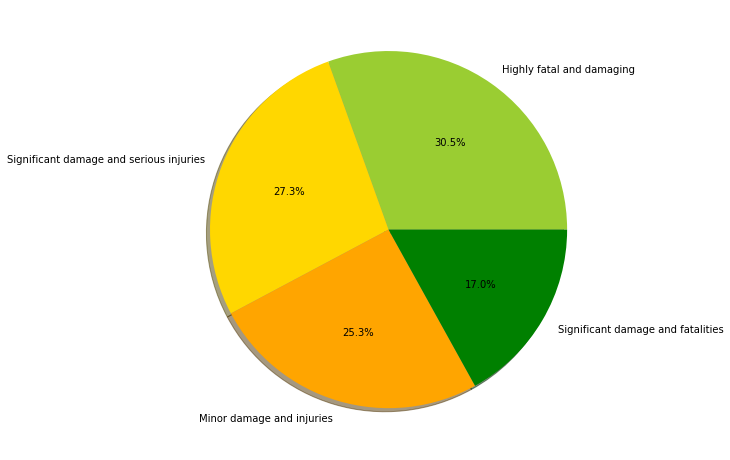

In [7]:
class_label = dataset['Severity'].value_counts()
total_points = len(dataset)
print("Points with class label -> 'Highly fatal and damaging' are = ",class_label.values[0]/total_points*
100,"%")
print("Points with class label -> 'Significant damage and serious injuries' are = ",class_label.values[1]/total_points*
100,"%")
print("Points with class label -> 'Minor damage and injuries' are = ",class_label.values[2]/total_points*
100,"%")
print("Points with class label -> 'Significant damage and fatalities' are = ",class_label.values[3]/total_points*
100,"%")
labels = ['Highly fatal and damaging','Significant damage and serious injuries','Minor damage and injuries','Significant damage and fatalities']
sizes = [30.490000000000002,27.29,25.27,16.950000000000003]
colors = ['yellowgreen', 'gold','orange','green']
plt.figure(figsize=(8,10))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

### 1. Training a random model and using it as a baseline

#### 1.1 Training a dummy classifier

In [8]:
dummy_clf = DummyClassifier(strategy="uniform") # uniform means that the model randomly assigns a class label given a quiery point.
dummy_clf.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

#### 1.2 Evaluating performance of random model using log loss

In [9]:
print("Log loss of random model on 'Training data' = ",metrics.log_loss(y_train,dummy_clf.predict_proba(x_train),labels=class_label.index))

print("Log loss of random model on 'Testing data' = ",metrics.log_loss(y_test,dummy_clf.predict_proba(x_test),labels=class_label.index))

Log loss of random model on 'Training data' =  1.3862943611198908
Log loss of random model on 'Testing data' =  1.3862943611198908


As the model that predicted class label randomly(random model). Any model should perform better than this i.e the log loss of the model should be less than the log loss of the random model.

### 2. Univarite analysis

Training a model(eg: Logistic Regression) with a single feature and analyzing whether the feature is important or not!.

In [10]:
lg = LogisticRegression(solver='lbfgs',multi_class='auto')
params = {'C':[0.0001,0.001,0.01,0.1,10,100,1000]}
gs = GridSearchCV(lg,param_grid=params,scoring='neg_log_loss')

### 2.1 Analyzing the importance of 'safety score' feature

We need to find out the best hyperparameters to use

In [11]:
gs.fit(x_train['Safety_Score'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.001}

Training the Logistic regression classifier with best hyper parameters

In [12]:
lg = LogisticRegression(C=0.001,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Safety_Score'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Safety_Score'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Safety_Score'].values.reshape(-1,1))))

log loss on train =  1.2917655685304592
log loss on test =  1.2826850159443983


### 2.2 Analyzing the importance of ' Total safety complaints' feature

Finding best hyperparameters to use.

In [13]:
gs.fit(x_train['Total_Safety_Complaints'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.0001}

Training the Logistic regression classifier with best hyper parameters

In [14]:
lg = LogisticRegression(C=0.0001,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Total_Safety_Complaints'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Total_Safety_Complaints'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Total_Safety_Complaints'].values.reshape(-1,1))))

log loss on train =  1.3663776532350884
log loss on test =  1.358053007926296


### 2.3 Analyzing the importance of ' Control metric ' feature

Finding best hyperparameters to use.

In [15]:
gs.fit(x_train['Control_Metric'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.001}

Training the Logistic regression classifier with best hyper parameters

In [16]:
lg = LogisticRegression(C=0.001,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Control_Metric'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Control_Metric'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Control_Metric'].values.reshape(-1,1))))

log loss on train =  1.3427547818526062
log loss on test =  1.3356987029702692


### 2.4 Analyzing the importance of ' Turbulence in gforces ' feature

Finding best hyperparameters to use.

In [17]:
gs.fit(x_train['Turbulence_In_gforces'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 10}

Training the Logistic regression classifier with best hyper parameters

In [18]:
lg.fit(x_train['Turbulence_In_gforces'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Turbulence_In_gforces'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Turbulence_In_gforces'].values.reshape(-1,1))))

log loss on train =  1.3663537912019346
log loss on test =  1.3577886447663294


### 2.5 Analyzing the importance of 'Cabin Temperature' feature

Finding best hyperparameters to use.

In [19]:
gs.fit(x_train['Cabin_Temperature'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.01}

Training the Logistic regression classifier with best hyper parameters

In [20]:
lg = LogisticRegression(C=0.01,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Cabin_Temperature'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Cabin_Temperature'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Cabin_Temperature'].values.reshape(-1,1))))

log loss on train =  1.3668765643531684
log loss on test =  1.358118529681163


### 2.6 Analyzing the importance of 'Accident type code' feature

Finding best hyperparameters to use.

In [21]:
gs.fit(x_train['Accident_Type_Code'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.01}

Training the Logistic regression classifier with best hyper parameters

In [22]:
lg = LogisticRegression(C=0.01,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Accident_Type_Code'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Accident_Type_Code'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Accident_Type_Code'].values.reshape(-1,1))))

log loss on train =  1.3318448860614638
log loss on test =  1.3210911272115684


### 2.7 Analyzing the importance of ' Max Elevation ' feature

Finding best hyperparameters to use.

In [23]:
gs.fit(x_train['Max_Elevation'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.0001}

Training the Logistic regression classifier with best hyper parameters

In [24]:
lg = LogisticRegression(C=0.0001,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Max_Elevation'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Max_Elevation'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Max_Elevation'].values.reshape(-1,1))))

log loss on train =  1.3668047964674779
log loss on test =  1.3584664516616578


### 2.8 Analyzing the importance of ' Violations ' feature
Finding best hyperparameters to use.

In [25]:
gs.fit(x_train['Violations'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 0.01}

Training the Logistic regression classifier with best hyper parameters

In [26]:
lg = LogisticRegression(C=0.01,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Violations'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Violations'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Violations'].values.reshape(-1,1))))

log loss on train =  1.364572275031594
log loss on test =  1.3545245508014554


### 2.9 Analyzing the importance of ' Adverse wather metric ' feature
Finding best hyperparameters to use.

In [27]:
gs.fit(x_train['Adverse_Weather_Metric'].values.reshape(-1,1),y_train)
gs.best_params_

{'C': 10}

Training the Logistic regression classifier with best hyper parameters

In [28]:
lg = LogisticRegression(C=10,solver='lbfgs',multi_class='auto')
lg.fit(x_train['Adverse_Weather_Metric'].values.reshape(-1,1),y_train)
print("log loss on train = ",metrics.log_loss(y_train,lg.predict_proba(x_train['Adverse_Weather_Metric'].values.reshape(-1,1))))
print("log loss on test = ",metrics.log_loss(y_test,lg.predict_proba(x_test['Adverse_Weather_Metric'].values.reshape(-1,1))))

log loss on train =  1.3514615584219047
log loss on test =  1.3383554796292159


### Conclusion

Features like 'Security score', 'Control metric', 'Accident type code' could alone reduce the log loss on the class labels. And these three features also had a stability among train,test,cv datasets.(i.e the log loss for these features was less relatively and same for train,test and cv sets.)

### Analyzing the correlation matrix of training data

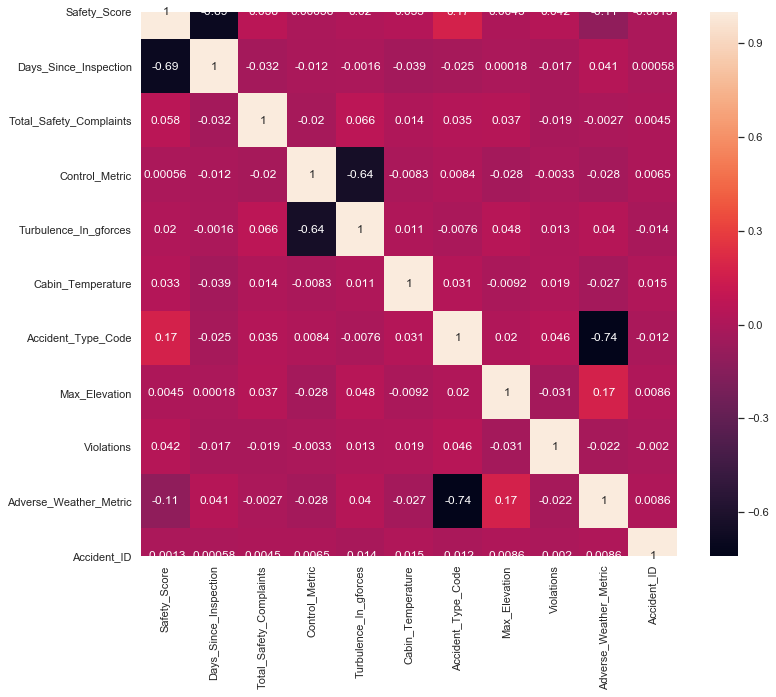

In [31]:
cor = dataset.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

<p> <b>From the dark boxes in the above matrix (the point of intersection of 2 parameters we get that: </b></p>
<p>Apart from the than turbulence and control metric, there is also a strong negative corelation between Adverse weather metric and accident type code.</p>
<p> We cannot simple remove a vaiable, because we don't know which feature drives an optimal result.</p>
<p>The same goes for the features safety score and days since inspection.</p>

### Adding the 'Total_Problems' feature

In [32]:
temp = x_train['Violations'] + x_train['Total_Safety_Complaints']
x_train['Total_Problems'] = temp

temp = x_test['Violations'] + x_test['Total_Safety_Complaints']
x_test['Total_Problems'] = temp

C:\Users\apmis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\apmis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Applying Random Forests

In [33]:
clf = RandomForestClassifier()
params = {'max_features': np.arange(1, 11),'criterion' :['gini', 'entropy']}
best_model = GridSearchCV(clf, params,n_jobs=-1)
best_model.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [34]:
best_model.best_params_

{'criterion': 'entropy', 'max_features': 10}

In [35]:
rf = RandomForestClassifier(criterion='entropy',max_features=8,n_estimators=1000)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))

0.9545


In [36]:
x = dataset.drop(['Severity','Accident_ID'],axis=1)
x['Total_Problems'] = dataset['Violations'] + dataset['Total_Safety_Complaints']

In [37]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Applying xgboost and finalizing the model

In [38]:
xgb = XGBClassifier()
xgb.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Testing the model created

In [43]:
#Creating Test dataset 
test = dataset.drop(['Severity'],axis=1)
test_data = dataset.drop(['Accident_ID','Severity'],axis=1)
test_data['Total_Problems'] = test_data['Violations'] + test_data['Total_Safety_Complaints']
test_data

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Total_Problems
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,25
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,29
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,19
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,10
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,27
...,...,...,...,...,...,...,...,...,...,...,...
9995,56.118721,8,1,63.445761,0.482359,78.64,5,38537.36341,2,0.026150,3
9996,40.365297,10,7,62.169553,0.421775,79.77,4,40846.91690,2,0.074898,9
9997,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173,4
9998,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381,2


### Testing random forest classifier

In [44]:
y_pred = rf.predict(test_data)
y_pred

array(['Minor_Damage_And_Injuries', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Minor_Damage_And_Injuries', 'Highly_Fatal_And_Damaging'],
      dtype=object)

In [45]:
pred = pd.DataFrame()
pred['Accident_ID'] = test['Accident_ID']
pred['Severity'] = y_pred

###Printing predictions
pred

,Accident_ID,Severity
0,7570,Minor_Damage_And_Injuries
1,12128,Minor_Damage_And_Injuries
2,2181,Significant_Damage_And_Fatalities
3,5946,Significant_Damage_And_Serious_Injuries
4,9054,Significant_Damage_And_Fatalities
...,...,...
9995,11493,Significant_Damage_And_Serious_Injuries
9996,305,Highly_Fatal_And_Damaging
9997,612,Significant_Damage_And_Serious_Injuries
9998,4963,Minor_Damage_And_Injuries


### Testing XGBClassifier

In [46]:
y_pred = xgb.predict(test_data)
y_pred

array(['Minor_Damage_And_Injuries', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Minor_Damage_And_Injuries', 'Highly_Fatal_And_Damaging'],
      dtype=object)

In [47]:
pred = pd.DataFrame()
pred['Accident_ID'] = test['Accident_ID']
pred['Severity'] = y_pred

###Printing predictions
pred

,Accident_ID,Severity
0,7570,Minor_Damage_And_Injuries
1,12128,Minor_Damage_And_Injuries
2,2181,Significant_Damage_And_Fatalities
3,5946,Significant_Damage_And_Serious_Injuries
4,9054,Significant_Damage_And_Fatalities
...,...,...
9995,11493,Significant_Damage_And_Serious_Injuries
9996,305,Highly_Fatal_And_Damaging
9997,612,Significant_Damage_And_Serious_Injuries
9998,4963,Minor_Damage_And_Injuries
